In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import csv
from detect_delimiter import detect

import project_functions2 as pf2
all_clean = pf2.load_and_process("../data/raw/pwt100.csv","../data/raw/days-of-vacation-and-holidays.csv")
all_clean.head()

c:\Users\Administrator\Desktop\Textbooks\cosc301\project-group17\notebooks\project_functions2.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[df_clean["country"] == df_clean["Entity"]].drop(["Entity"], axis=1)[df_clean['year'] >= 1980]


,countrycode,country,currency_unit,year,rgdpe,pop,emp,avh,hc,cn,ctfp,vac,prod
590,AUS,Australia,Australian Dollar,1980,349085.7813,14.588405,6.277514,1909.762827,3.213360,1535867.125,0.845172,32.0,58.236464
591,AUS,Australia,Australian Dollar,1981,366343.1250,14.777243,6.356343,1894.809448,3.232605,1602208.250,0.856549,32.0,60.833830
592,AUS,Australia,Australian Dollar,1982,357623.9688,14.979205,6.340231,1870.658317,3.251965,1648038.250,0.845694,32.0,60.305516
593,AUS,Australia,Australian Dollar,1983,377933.2813,15.194641,6.241294,1857.014130,3.271441,1689566.875,0.871549,32.0,65.216170
594,AUS,Australia,Australian Dollar,1984,392094.8750,15.423166,6.458382,1878.158461,3.291033,1742347.000,0.839384,32.0,64.649503


<AxesSubplot:title={'center':'Correlation Matrix'}>

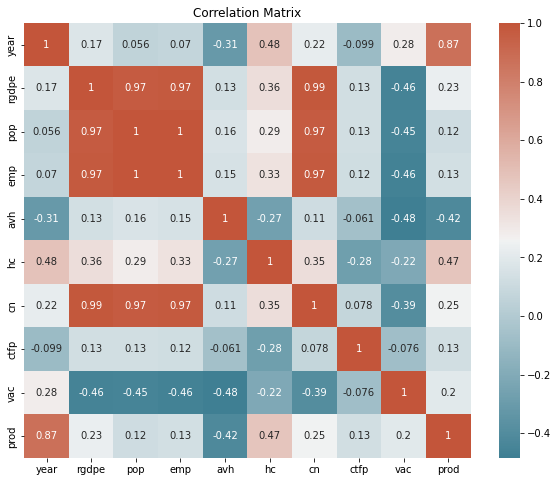

In [2]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Correlation Matrix')
corr = all_clean.corr() 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Text(0.5, 1.0, 'Productivity of Engaged Population across Years')

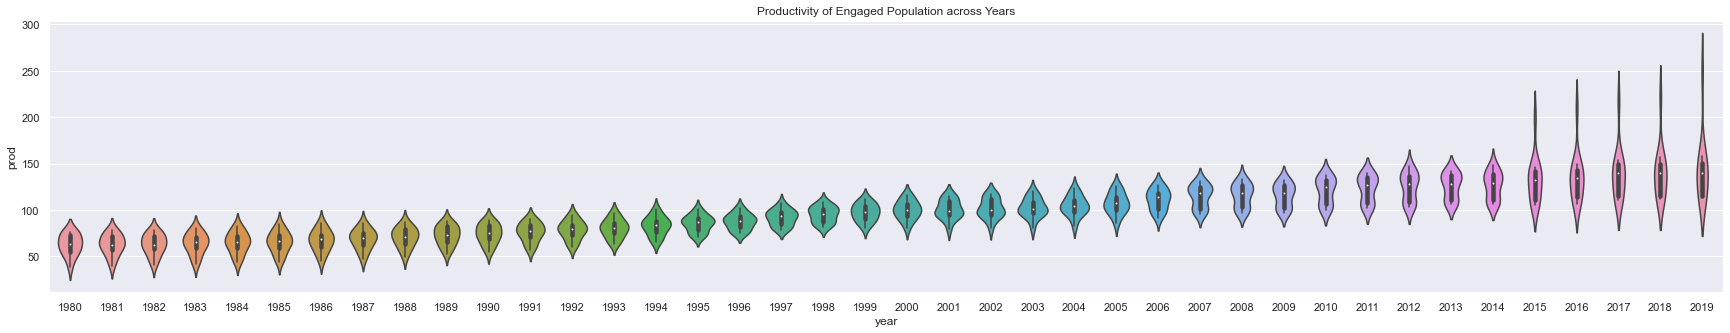

In [125]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.violinplot(data=all_clean, x="year", y="prod")
ax.set_title('Productivity of Engaged Population across Years')

##This is kinda long, probably not going to use for actual analysis

Text(0.5, 30.49999999999995, 'Average Time Worked by Engaged Population [Hours]')

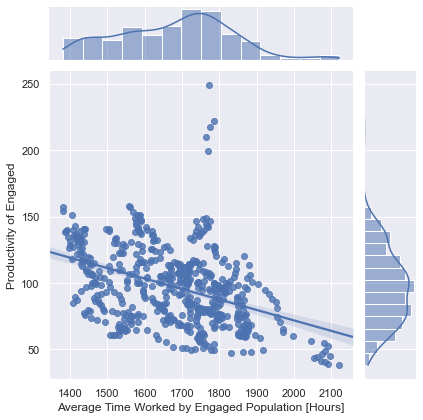

In [126]:
sns.set_theme(style="darkgrid")
h = sns.jointplot(x = all_clean['avh'], y = all_clean['prod'], kind = 'reg',truncate=False)

h.ax_joint.set_ylabel("Productivity of Engaged")
h.ax_joint.set_xlabel("Average Time Worked by Engaged Population [Hours]")

## deciding which plot is more useful between this and the one below.
## Probably the one below, the year information seems good to add, and I cant have both that and the histograms

<ipython-input-123-ad38622c4f78>:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h, label='Year')


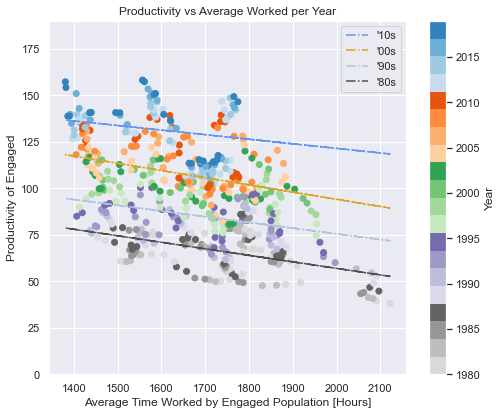

In [123]:
fig, ax = plt.subplots(figsize=(8, 6.5))

X = all_clean['avh'].to_numpy()
Y = all_clean['prod'].to_numpy()
z = all_clean['year'].to_numpy()

ind1 = np.where((z >= 1980)&(z<1990))
ind2 = np.where((z >= 1990)&(z<2000))
ind3 = np.where((z >= 2000)&(z<2010))
ind4 = np.where((z >= 2010)&(z<2020))
coef1 = np.polyfit(X[ind1], Y[ind1], 1)
p1 = np.poly1d(coef1)
coef2 = np.polyfit(X[ind2], Y[ind2], 1)
p2 = np.poly1d(coef2)
coef3 = np.polyfit(X[ind3], Y[ind3], 1)
p3 = np.poly1d(coef3)
coef4 = np.polyfit(X[ind4], Y[ind4], 1)
p4 = np.poly1d(coef4)

ax.set_xlabel("Average Time Worked by Engaged Population [Hours]")
ax.set_ylabel("Productivity of Engaged")
h = ax.scatter(x = X, y = Y, c=z, cmap='tab20c_r')
ax.plot(X, p4(X), c='cornflowerblue', linestyle='-.', label="'10s")
ax.plot(X, p3(X), 'goldenrod', linestyle='-.', label="'00s")
ax.plot(X, p2(X), 'lightsteelblue', linestyle='-.', label="'90s")
ax.plot(X, p1(X), '0.3', linestyle='-.', label="'80s")



ax.set_ylim(0, 190)
plt.colorbar(h, label='Year')
ax.set_title('Productivity vs Average Worked per Year')
ax.legend()

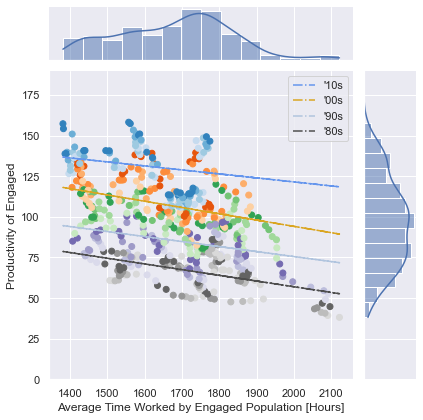

In [135]:
ax1=sns.jointplot(x = all_clean['avh'], y = all_clean['prod'], kind = 'reg',truncate=False)
ax1.ax_joint.cla()
#plt.sca(h.ax_joint)


X = all_clean['avh'].to_numpy()
Y = all_clean['prod'].to_numpy()
z = all_clean['year'].to_numpy()

ind1 = np.where((z >= 1980)&(z<1990))
ind2 = np.where((z >= 1990)&(z<2000))
ind3 = np.where((z >= 2000)&(z<2010))
ind4 = np.where((z >= 2010)&(z<2020))
coef1 = np.polyfit(X[ind1], Y[ind1], 1)
p1 = np.poly1d(coef1)
coef2 = np.polyfit(X[ind2], Y[ind2], 1)
p2 = np.poly1d(coef2)
coef3 = np.polyfit(X[ind3], Y[ind3], 1)
p3 = np.poly1d(coef3)
coef4 = np.polyfit(X[ind4], Y[ind4], 1)
p4 = np.poly1d(coef4)

plt.xlabel("Average Time Worked by Engaged Population [Hours]")
plt.ylabel("Productivity of Engaged")
plt.scatter(x = X, y = Y, c=z, cmap='tab20c_r')
plt.plot(X, p4(X), c='cornflowerblue', linestyle='-.', label="'10s")
plt.plot(X, p3(X), 'goldenrod', linestyle='-.', label="'00s")
plt.plot(X, p2(X), 'lightsteelblue', linestyle='-.', label="'90s")
plt.plot(X, p1(X), '0.3', linestyle='-.', label="'80s")



plt.ylim(0, 190)
#plt.title('Productivity vs Average Worked per Year')
plt.legend()

_figure x_, Plotted above on the y-axis is a measure of Productivity, the Expenditure-side real GDP produced per Hour Worked by those engaged in a population. 